In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_Adv_AI_LT/glaucoma.csv")

**IMPORT LIBRARIES**

In [ ]:
train_label = pd.read_csv('/content/drive/MyDrive/Project_Adv_AI_LT/glaucoma.csv')
y_train = train_label['Glaucoma']
train_label.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [ ]:
df.describe()

,ExpCDR,Glaucoma
count,650.000000,650.000000
mean,0.576308,0.258462
std,0.116395,0.438126
min,0.161000,0.000000
25%,0.496675,0.000000
50%,0.567650,0.000000
75%,0.648475,1.000000
max,0.962900,1.000000


In [ ]:
df.isnull().sum()

Filename    0
ExpCDR      0
Eye         0
Set         0
Glaucoma    0
dtype: int64

In [ ]:
df.shape

(650, 5)

In [ ]:
from numpy import asarray
from PIL import Image
# load the image
image = Image.open('/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive/613.jpg')
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
pixels = asarray(image)

JPEG
RGB
(3072, 2048)


In [ ]:
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)


# example of pixel normalization
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
mean = pixels.mean()
print('pixel mean = ', mean)

# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels)

Mean: 73.460
Min: 0.000, Max: 255.000
Mean: -0.000
Min: -73.460, Max: 181.540
[[[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 [[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 [[-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  [-71.46045897 -71.46045897 -73.46045897]
  ...
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]
  [-72.46045897 -72.46045897 -73.46045897]]

 ...

 [[-73.46045897 -73.46045897 -73.46045897]
  [-73.46045897 -73.46045897 -73.46045897]
  [-73.46045897 -73.46045897 -73

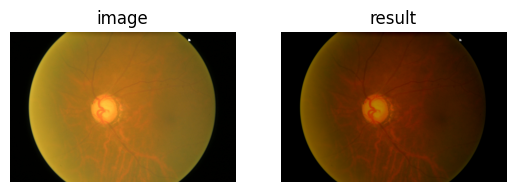

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image)
ax0.axis('off')
ax0.set_title('image')
ax1.imshow(pixels)
ax1.axis('off')
ax1.set_title('result')
plt.show()

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

**AUGUMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

**MODELLING**

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'

TEST_DIR = '/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [ ]:
num_images_train = len(TRAIN_DIR)
print(num_images_train)

89


In [ ]:
num_images_test = len(TEST_DIR)
print(num_images_test)

94


In [ ]:
num_images_neg_train = len('/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative')
print(num_images_neg_train)

107


In [ ]:
num_images_pos_train = len('/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive')
print(num_images_pos_train)

107


In [ ]:
num_images_neg_test = len('/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Negative')
print(num_images_neg_test)

112


In [ ]:
num_images_pos_test = len('/content/drive/MyDrive/Project_Adv_AI_LT/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive')
print(num_images_pos_test)

112


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
import keras
import matplotlib.pyplot as plt

HEIGHT = 300
WIDTH = 300

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 20
BATCH_SIZE = 8

def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)




resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam(lr = 0.00001)
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]

print(train_generator.class_indices)

resnet50_model.summary()

Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


1024
512
256
{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1_conv[0][0]']          
 on)                          

In [ ]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 50,
                                       shuffle = True, validation_data = test_generator)

<ipython-input-17-ffd35819e062>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 50,


Epoch 1/20
50/50 [==============================] - 40s 708ms/step - loss: 59.0986 - accuracy: 0.6300 - val_loss: 32.6157 - val_accuracy: 0.2615
Epoch 2/20
50/50 [==============================] - 33s 660ms/step - loss: 34.8928 - accuracy: 0.6150 - val_loss: 11.7390 - val_accuracy: 0.7385
Epoch 3/20
50/50 [==============================] - 33s 661ms/step - loss: 14.4323 - accuracy: 0.6400 - val_loss: 3.8006 - val_accuracy: 0.7385
Epoch 4/20
50/50 [==============================] - 33s 666ms/step - loss: 8.0018 - accuracy: 0.6550 - val_loss: 1.7689 - val_accuracy: 0.5308
Epoch 5/20
50/50 [==============================] - 33s 656ms/step - loss: 6.6405 - accuracy: 0.6500 - val_loss: 0.9973 - val_accuracy: 0.7231
Epoch 6/20
50/50 [==============================] - 33s 662ms/step - loss: 5.1033 - accuracy: 0.6600 - val_loss: 0.6378 - val_accuracy: 0.7462
Epoch 7/20
50/50 [==============================] - 33s 671ms/step - loss: 3.3156 - accuracy: 0.6550 - val_loss: 0.6198 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

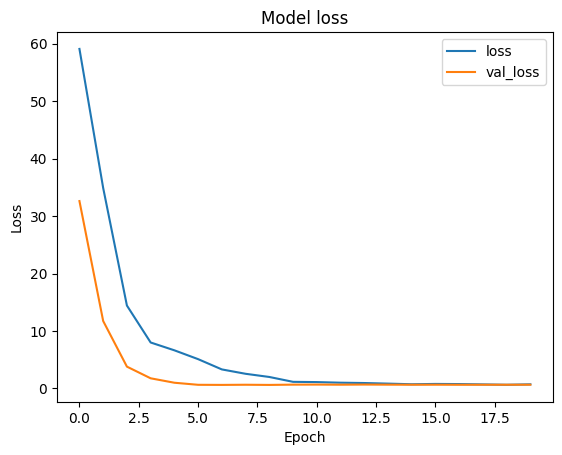

In [ ]:
# Plot the training process to see the reduction of the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

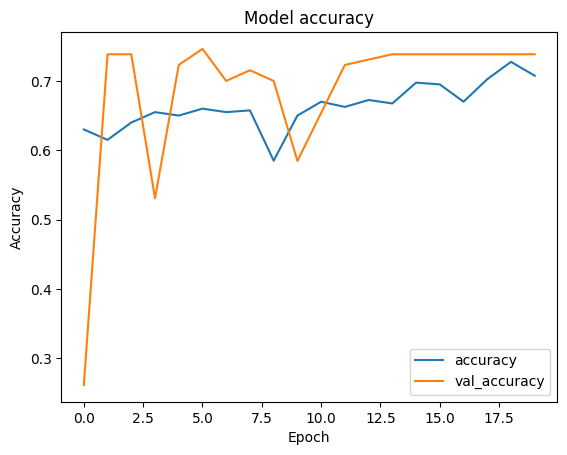

In [ ]:
# Plot the training process to see the improment of the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [ ]:
Y_pred = resnet50_model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cf_matrix = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))

<ipython-input-22-cb181f41670e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = resnet50_model.predict_generator(test_generator)


Confusion Matrix
[[96  0]
 [34  0]]


In [ ]:
print("ACCURACY SCORE  :",accuracy_score(test_generator.classes,y_pred))

ACCURACY SCORE  : 0.7384615384615385


In [ ]:
# import the scikit-learn library
from sklearn import metrics

# calculate the f1 score
f1 = metrics.f1_score(test_generator.classes, y_pred, average='weighted')
print('F1 score:', f1)

# calculate the precision
precision = metrics.precision_score(test_generator.classes, y_pred, average='weighted')
print('Precision:', precision)


F1 score: 0.6273655547991831
Precision: 0.5453254437869823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

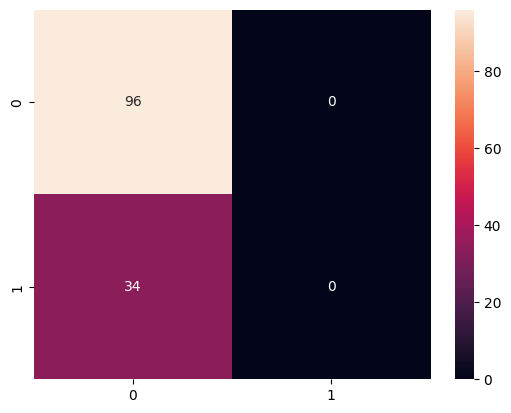

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'Negative',
    1: 'Positive'}

**INTERCEPTION V3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [ ]:
base_model_2 = InceptionV3(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

In [ ]:
inception_model = build_model(base_model_2,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))
inception_model.compile(optimizer = RMSprop(lr = 0.00001), loss="binary_crossentropy", metrics=["accuracy"])
inception_model.summary()

In [ ]:
history_2 = inception_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 50,
                                       shuffle = True, validation_data = test_generator)

In [ ]:
# Plot the training process to see the reduction of the loss
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Plot the training process to see the improment of the accuracy
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()